In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns 

warnings.filterwarnings("ignore")

%matplotlib inline 

In [44]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [45]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


 ## Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [46]:
df.shape

(10841, 13)

## . How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

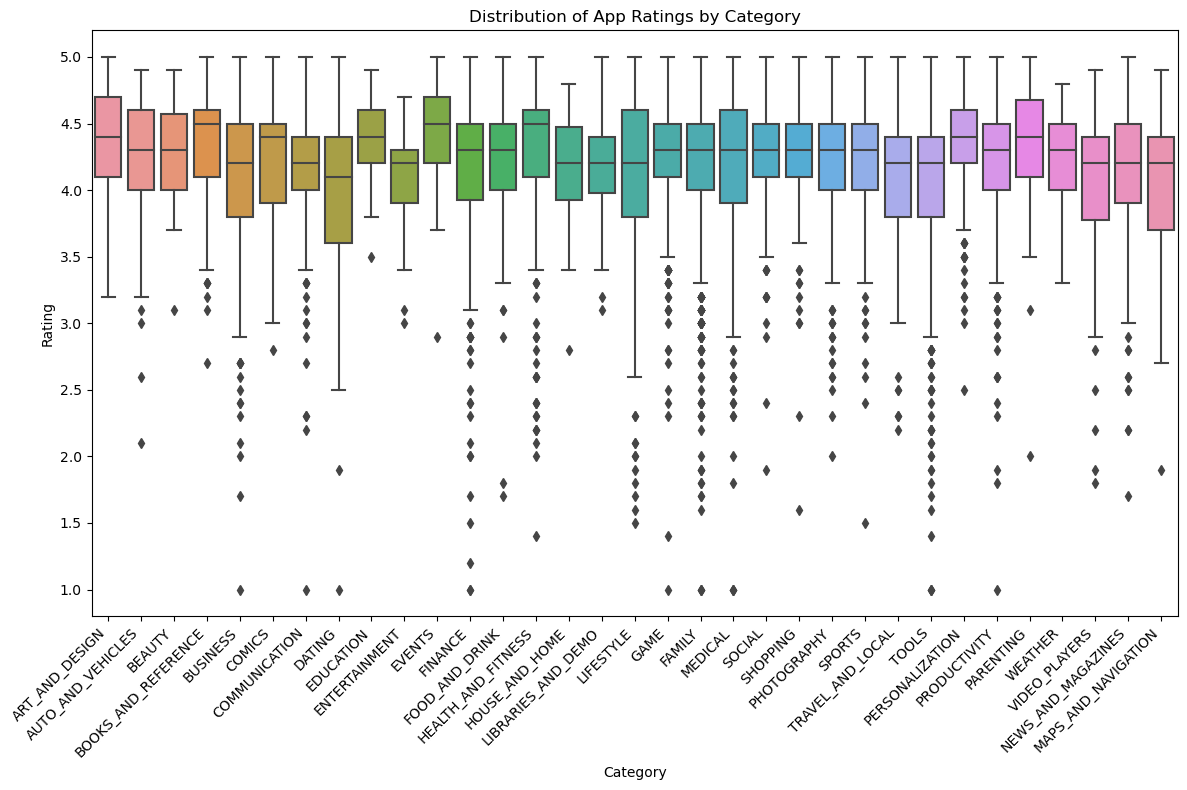

In [47]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Rating',data=df_copy)
plt.title('Distribution of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##  Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [48]:
#Missing vale 
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

yes dataset have missing value in Rating column it will have deep impact on categories like App,Installs 

In [49]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
## Dropping MIssing value 

In [51]:
df['Reviews'].str.isnumeric().sum()

10840

In [52]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [53]:
#dropping the above one row 
df_copy=df.copy()

In [54]:
df_copy=df_copy.drop(df_copy.index[10472])

In [55]:
df_copy[~df_copy['Reviews'].str.isnumeric()]  #row deleted 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [56]:
df_copy['Reviews']=df_copy['Reviews'].astype('int')

In [57]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


## Cleaning the Datset

In [58]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [59]:
#converting the M into K means 13=13000

In [60]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [61]:
#removing the unwanted Characters from above Installs,Price columns

In [62]:
char_to_remove=['+',',','$']
col_to_clean=['Installs','Price']
for item in char_to_remove:
    for cols in  col_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')
        

In [63]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [64]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

## . What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

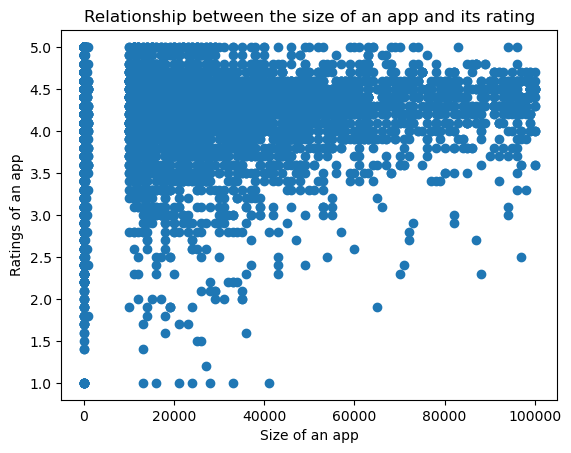

In [65]:
plt.scatter(x='Size',y='Rating',data=df_copy)
plt.xlabel('Size of an app')
plt.ylabel('Ratings of an app')
plt.title('Relationship between the size of an app and its rating')
plt.show()

## Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

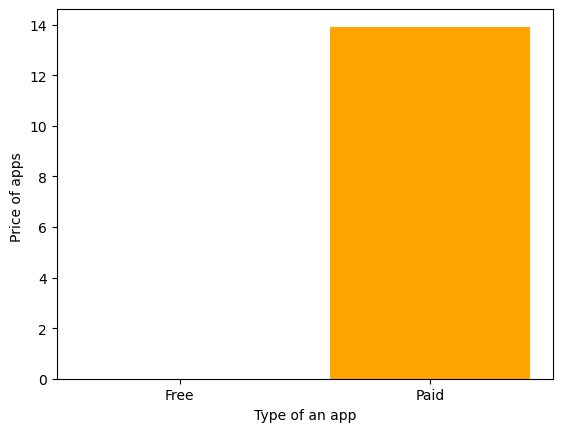

In [66]:
average_prices_by_type = df_copy.groupby('Type')['Price'].mean().reset_index()
plt.bar(average_prices_by_type['Type'], average_prices_by_type['Price'], color=['skyblue', 'orange'])
plt.xlabel('Type of an app')
plt.ylabel('Price of apps ')
plt.show()

## What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [67]:
df_sort=df_copy.sort_values(by='Installs',ascending=False)
top_apps=df_sort.head(10)
freuency_table=top_apps[['App','Installs']]
print(freuency_table)

                                           App    Installs
3896                            Subway Surfers  1000000000
3943                                  Facebook  1000000000
335   Messenger – Text and Video Chat for Free  1000000000
3523                              Google Drive  1000000000
3565                              Google Drive  1000000000
2884                             Google Photos  1000000000
3665                                   YouTube  1000000000
2853                             Google Photos  1000000000
4234             Skype - free IM & video calls  1000000000
3687                   Google Play Movies & TV  1000000000


##  A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

<AxesSubplot: ylabel='Category'>

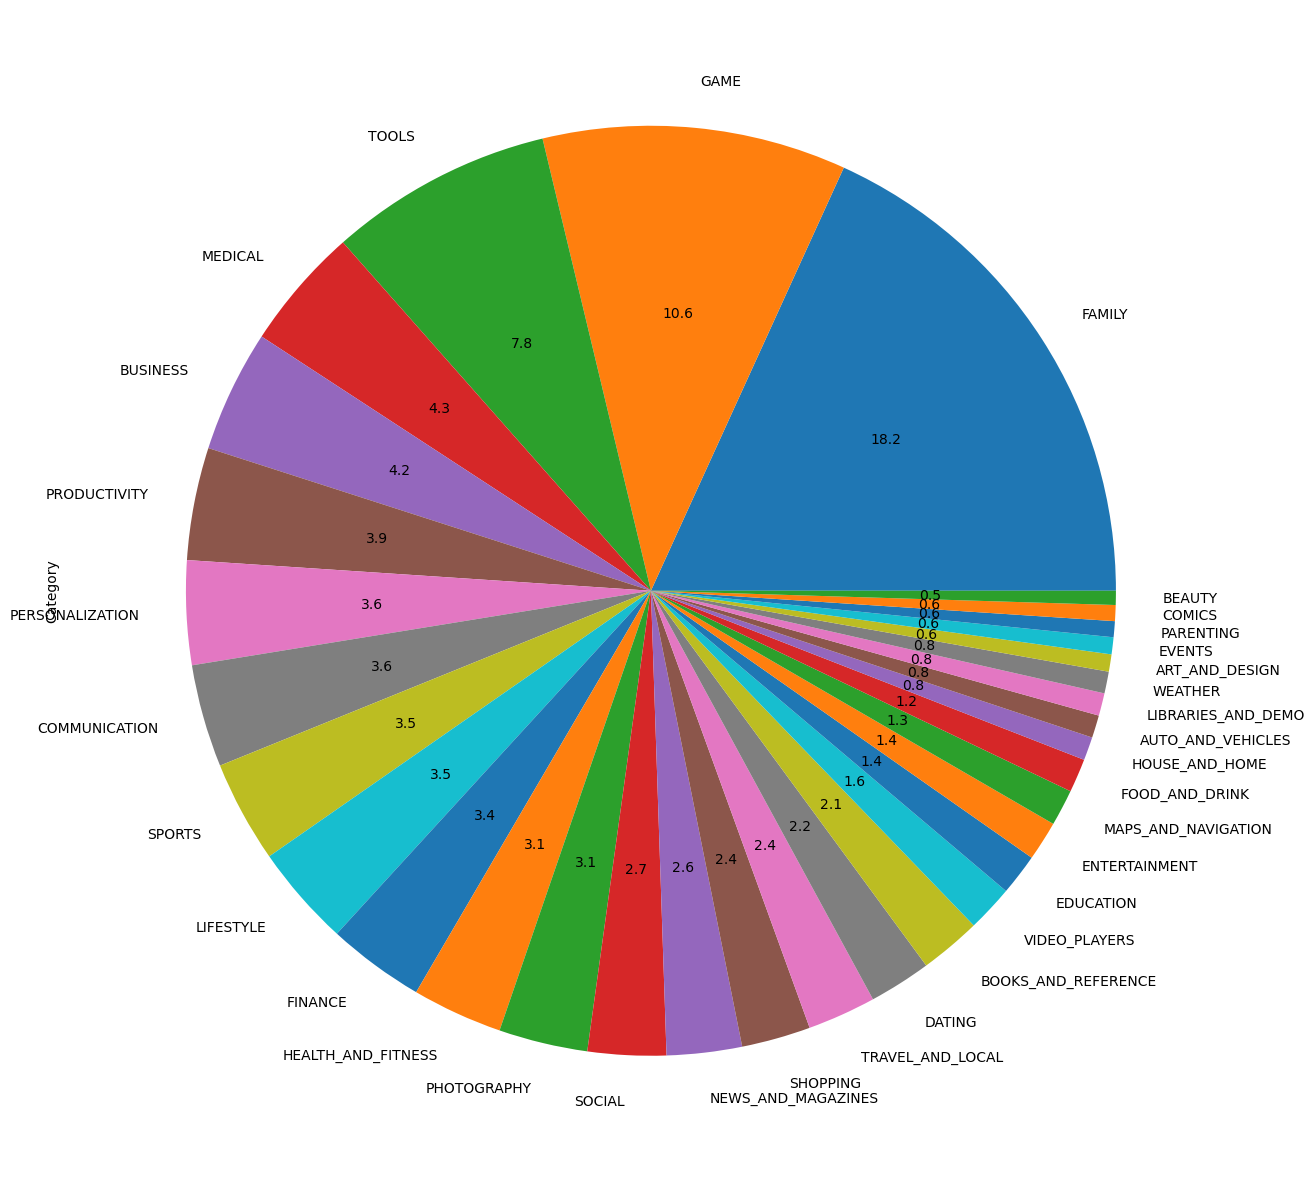

In [68]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

most intalled is family ,games and tools
least intalled  is beauty ,comics and weather

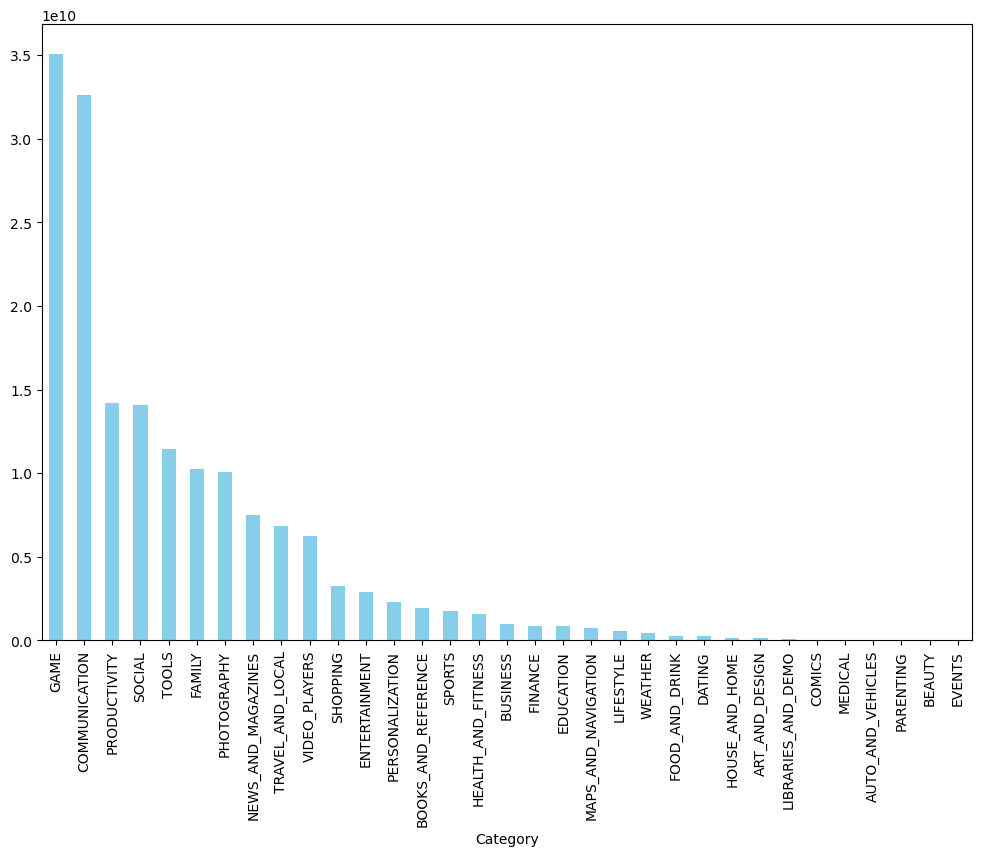

In [69]:
#Considering Installs 
avg_Installs=df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
avg_Installs.plot(kind='bar', color='skyblue')
plt.show()

GAME,COMMUNICATION,TOOLS HAVE HIGHEST NO. OF INTALLS 

so BY RECOMENDATION company can developed an app based on "GAME"or "TOOL" category

##  A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

We can use features like number of installs,Average Ratings ,Number of Reviews 

In [ ]:
dev_Installs=df_copy.groupby('App')['Installs'].sum().sort_values(ascending=False)
dev_Installs.plot(kind='bar', color='skyblue')
plt.show()

In [ ]:
df_copy[df_copy.duplicated('App')].shape

In [ ]:
df_copy.head(10)

## Observation 
The dataset has Duplicated 

In [ ]:
df_copy=df_copy.drop_duplicates(subset=['App'],keep='first')

In [ ]:
df_copy[df_copy.duplicated('App')].shape

In [ ]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

## Visualization Diagram 

In [ ]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## OBSERVATION

rating,last updated  and year is left skewed whereas Review,Size,Installs,Price are right skewed 

In [ ]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Which is the most popular app category ?

In [ ]:
df_copy.head()

In [ ]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15,16),autopct='%1.1f')

## most  is family ,games and tools 
## least is beauty ,comics and weather 

## Top 10 APP CATEGORIES 

In [ ]:
category=pd.DataFrame(df_copy['Category'].value_counts())
category.rename(columns={'Category':'Count'} ,inplace =True)

In [ ]:
category.head(10)

In [ ]:
## top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

## Insights
1. Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.
2. Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

## Which Category has largest number of installations?

In [ ]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize=(15,6))
sns.barplot(x='Installs',y='Category',data=df2, palette='hls')
plt.title('Largest no. of Installations')
plt.xticks(rotation=90)
plt.show()

## Observation
Game category has largest number of intallation 

## What are the Top 5 most installed Apps in Each popular Categories ??

In [ ]:
# Find the top 5 most installed apps in each popular category
popular_categories = df_copy['Category'].value_counts().head(5).index
for category in popular_categories:
    # Select rows for the current category and sort by installs in descending order
    category_data = df_copy[df_copy['Category'] == category].sort_values(by='Installs', ascending=False).head(5)
    print(category_data.iloc[:,0])

    # Create a bar plot for the top 5 installed apps in the current category
    plt.figure(figsize=(10, 6))
    plt.bar(category_data['App'], category_data['Installs'], color='skyblue')
    plt.xlabel('Apps')
    plt.ylabel('Number of Installs')
    plt.title(f'Top 5 Most Installed Apps in {category}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Observations

## How many apps are there on Google Play Store which get 5 ratings??

In [ ]:
apps_with_5_ratings = df_copy[df_copy['Rating'] == 5]

# Get the count of apps with a rating of 5
number_of_apps_with_5_ratings = len(apps_with_5_ratings)
print("Total numbers of app which get 5 star rating =",number_of_apps_with_5_ratings)
